# Nelder Mead Simplex Method

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [42]:
def objective_function(X):
    return abs(X[0]**2-4*X[0]+X[1]**2-X[1]-X[0]*X[1])

In [45]:

def objective_function(X):
    return abs(X[0]**2-4*X[0]+X[1]**2-X[1]-X[0]*X[1])

def reflection_point(x,alpha,mean):
    xr=(mean[0]+alpha*(mean[0]-x[0]),mean[1]+alpha*(mean[1]-x[1]))
    return xr
def expansion_point(xr,beta,mean):
    xe=(mean[0]+beta*(-mean[0]+xr[0]),mean[1]+beta*(-mean[1]+xr[1]))
    return xe
def contraction_point(x,gamma,mean):
    xc=(mean[0]+gamma*(-mean[0]+x[0]),mean[1]+gamma*(-mean[1]+x[1]))
    return xc
def shrink(x,xl):
    return ((x[0]+xl[0])/2,(x[1]+xl[1])/2)
def conv_test(simplex):
    delta=np.array([objective_function(i) for i in simplex])
    a=delta-(sum(delta)/len(delta))
    conv_testt=math.sqrt((1/(len(delta)+1))*(a.dot(a)))
    return conv_testt


def Nelder_mead(simplex,epsilon,alpha,beta,gamma):
    z=conv_test(simplex)
    x=0
    A=[z]
    B=[x]
    while z>epsilon:
        temp=[[i,objective_function(i)] for i in simplex]
        temp.sort(key=lambda x:x[1])
        xh=temp[-1][0]
        xl=temp[0][0]
        xs=temp[1][0]
        mean=(sum(i[0][0] for i in temp)/len(simplex),sum(i[0][1] for i in temp)/len(simplex))
        xr=reflection_point(xh,alpha,mean)
        yr=objective_function(xr)
        yl=temp[-1][1]
        if yr<yl:
            xe=expansion_point(xr,beta,mean)
            ye=objective_function(xe)
            if ye<yr:
                temp.pop(-1)
                temp.append([xe,ye])
            else:
                temp.pop(-1)
                temp.append([xr,yr])
        else:
            ys=objective_function(xs)
            if yr<ys:
                temp.pop(-1)
                temp.append([xr,yr])
            else:
                yh=objective_function(xh)
                if yr<yh:
                    temp.pop(-1)
                    temp.append([xr,yr])
                else:
                    xc=contraction_point(xh,gamma,mean)
                    yc=objective_function(xc)
                    if yc>yh:
                        xh=shrink(xh,xl)
                        xs=shrink(xs,xl)
                    else:
                        temp.pop(-1)
                        temp.append([xc,yc])
        
        simplex=[i[0] for i in temp]
        z=conv_test(simplex)
        x+=1
        A.append(z)
        B.append(x)
        if x%50==0:
            print('iter',x )
            print(f'The convergence is ',z)
            print()
    print('iter',x)
    print(f'The convergence is {z}')
    print()
    
    
    print(f'The minimum value obtained is {temp[0][1]} and the minimizer is at {temp[0][0]}')
    plt.figure(figsize=(12,10))
    plt.plot(B,A)
    plt.ylabel('Convergence')
    plt.xlabel('iterations')
    

iter 50
The convergence is  1.1374095672494553

iter 100
The convergence is  0.7996250150946849

iter 150
The convergence is  0.48161806458010664

iter 188
The convergence is 0.00889189159186722

The minimum value obtained is 0.005712769619194091 and the minimizer is at (5.138545953360799, 4.960219478737586)


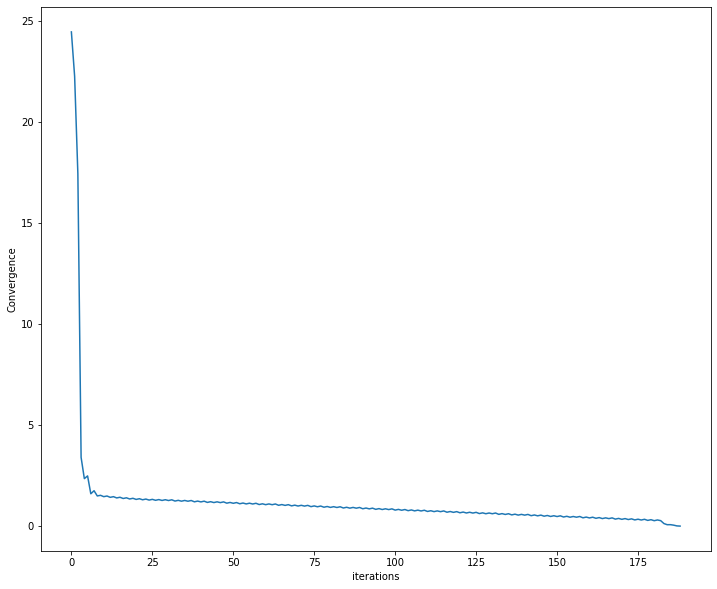

In [46]:
simplex=[(10,20),(15,18),(22,14)]
Nelder_mead(simplex,0.01,1,2,0.5)